In [1]:
import numpy as np
import scipy as sp
import constants as c
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from simu import Simu

In [2]:
simulation = Simu()
simulation.particle.a = 1.0e-0
simulation.disk.gas.alpha = 1.0e-3

simulation.particle.x = 5.2/np.sqrt(2)*c.AU
simulation.particle.y = 5.2/np.sqrt(2)*c.AU
simulation.particle.z = 0.8*c.AU

simulation.disk.r_min = 3*c.AU
simulation.disk.r_max = 6*c.AU
simulation.disk.z_max = 1.0*c.AU
simulation.particle.diffusion = False 
simulation.parameters.collisions = False

simulation.initialize()
simulation.update()

In [3]:
r_grid = simulation.disk.r_grid/c.AU
z_grid = simulation.disk.z_grid/c.AU

z_plot,r_plot = np.meshgrid(z_grid, r_grid)
hg_plot = np.zeros_like(z_plot)


hg = simulation.disk.gas.h_1d/c.AU


for i, hg in enumerate(hg):
    hg_plot[i,:] = z_plot[i,:]/hg

rho_g = simulation.disk.gas.rho_2d

In [4]:
simulation.run(t_tot=5000) #run the simulation for t_tot years
data = simulation.parameters.data #[t,z,r,a]

#### Plot

In [5]:
from matplotlib.collections import LineCollection
from matplotlib.colors import ListedColormap, BoundaryNorm

In [6]:
t = data[:,0]/c.yr
r = data[:,2]/c.AU
z = data[:,1]/c.AU
a = data[:,3]
T = data[:,4]

# Create a set of line segments so that we can color them individually
# This creates the points as a N x 1 x 2 array so that we can stack points
# together easily to get the segments. The segments array for line collection
# needs to be (numlines) x (points per line) x 2 (for x and y)
points = np.array([r, z]).T.reshape(-1, 1, 2)
segments = np.concatenate([points[:-1], points[1:]], axis=1)

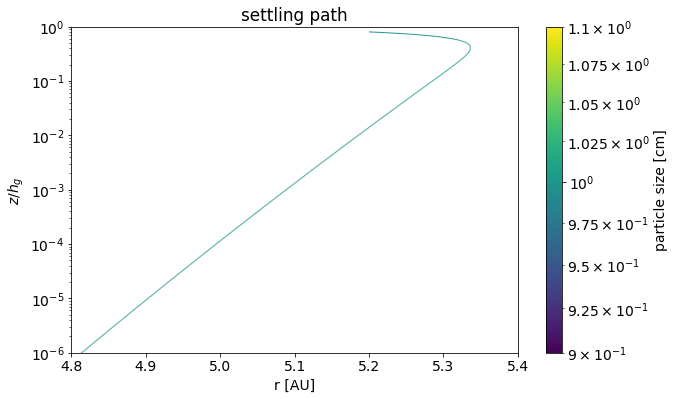

In [7]:
font = {'weight' : 'normal',
        'size'   : 14}
plt.rc('font', **font)


amin = np.min(rho_g)
amax = np.max(rho_g)


fig, axs = plt.subplots(1, 1,figsize=(10,6))
#axs.pcolormesh(r_plot, hg_plot, rho_g,norm=colors.LogNorm(vmin=1.0e-20, vmax=amax), cmap='magma')

#plot the disk scale heights
'''
axs.plot(r_grid,0.*hg,color='r',linestyle=':')
axs.plot(r_grid,1.*hg,color='r',linestyle=':')
axs.plot(r_grid,2.*hg,color='r',linestyle=':')
axs.plot(r_grid,3.*hg,color='r',linestyle=':')
axs.plot(r_grid,-1.*hg,color='r',linestyle=':')
axs.plot(r_grid,-2.*hg,color='r',linestyle=':')
axs.plot(r_grid,-3.*hg,color='r',linestyle=':')
'''
# Create a continuous norm to map from data points to colors
#norm = plt.Normalize(a.min(), a.max())
norm=colors.LogNorm(vmin=a.min(), vmax=a.max())
lc = LineCollection(segments, cmap='viridis', norm=norm)
# Set the values used for colormapping
lc.set_array(a)
lc.set_linewidth(1.0)
line = axs.add_collection(lc)
cbar=fig.colorbar(line, ax=axs)
cbar.set_label('particle size [cm]')

plt.xlabel('r [AU]')
plt.ylabel(r'$z/h_g$ ')

#axs.set_xlim(simulation.disk.r_min/c.AU,simulation.disk.r_max/c.AU)

axs.set_xlim(4.8,5.4)#in units of hg
axs.set_ylim(1.0e-6,1)#in units of hg
axs.set_yscale('log')
axs.set_title('settling path')
#axs.set_ylim(simulation.disk.z_min/c.AU,simulation.disk.z_max/c.AU)
plt.show()

detail plots

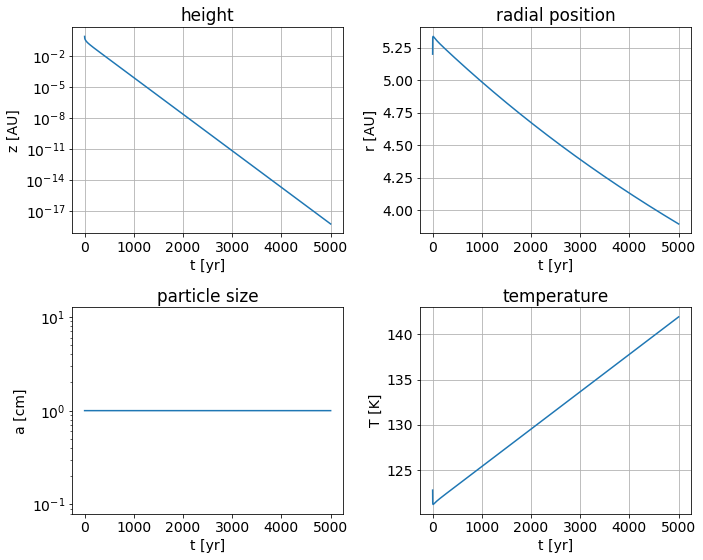

In [8]:
fig, ax = plt.subplots(2, 2,figsize=(10,8))

ax[0][0].plot(t,z)
ax[0][0].set_title('height')
ax[0][0].set_xlabel('t [yr]')
ax[0][0].set_ylabel('z [AU]')
ax[0][0].set_yscale('log')
ax[0][0].grid()



ax[0][1].plot(t,r)
ax[0][1].set_title('radial position')
ax[0][1].set_xlabel('t [yr]')
ax[0][1].set_ylabel('r [AU]')
ax[0][1].grid()

ax[1][0].plot(t,a)
ax[1][0].set_title('particle size')
ax[1][0].set_xlabel('t [yr]')
ax[1][0].set_ylabel('a [cm]')
ax[1][0].set_yscale('log')

ax[1][1].plot(t,T)
ax[1][1].set_title('temperature')
ax[1][1].set_xlabel('t [yr]')
ax[1][1].set_ylabel('T [K]')
ax[1][1].grid()



plt.tight_layout()
plt.show()